# Single Layer Perceptron

## 데이터셋 다운로드

폴더 경로 저장

In [1]:
datasetPath = "/content/drive/MyDrive/dataset/"
parameterPath = "/content/drive/MyDrive/parameters/"

패키지 선언

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader

Dataset 선언

In [3]:
# Training dataset 다운로드
mnist_train = dataset.MNIST(root = datasetPath,
                            train = True, # train 데이터셋이면 true
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
mnist_test = dataset.MNIST(root = datasetPath,
                           train = False, # train 데이터셋이 아닌(test 데이터셋이면) false
                           transform = transform.ToTensor(),
                           download = True)

데이터셋 저장 여부 확인 : 데이터셋들이 dataset/MNIST/raw/ ~ 

MNIST 데이터셋 형상 확인

60000
torch.Size([1, 28, 28])
5


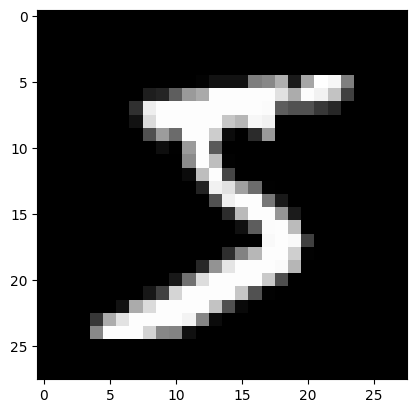

In [4]:
import matplotlib.pyplot as plt
print(len(mnist_train)) #train 데이터셋 개수 확인 : 6만개

first_data = mnist_train[0] 
print(first_data[0].shape)  # 첫번째 data의 형상 확인 - 데이터 이미지 (1x28x28pixels)
print(first_data[1])        # 첫번째 data의 정답 확인 - 데이터 값(숫자) (5)

plt.imshow(first_data[0][0,:,:], cmap = 'gray')
plt.show()

2D형태 이미지의 전처리 -> 평탄화

In [5]:
first_img = first_data[0]
print(first_img.shape)

first_img = first_img.view(-1, 28*28) # 이미지 평탄화 수행 2D(28x28) -> 1D(784x1)
print(first_img.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


## Single Layer Perceptron 모델 정의

In [6]:
class SLP(nn.Module):

  def __init__(self): # Parameter를 가지는 layer 정보, activation function
    super(SLP, self).__init__()
    # SLP의 입력은 784개, 출력은 10개
    self.fc = nn.Linear(in_features = 784, out_features = 10) #mlp는 fc가 여러 개
    # torch.nn.Linear = Fully connected layer

  def forward(self, x): # 모델의 동작 순서, 각 layer&함수의 입출력 관계
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.fc(x)
    return y

Hyper-parameters 지정

In [7]:
batch_size = 100    #hyper-parameters
learning_rate = 0.1 #hyper-parameters
training_epochs = 15  #hyper-parameters
loss_function = nn.CrossEntropyLoss() #softmax 적용, cross entryopy loss
network = SLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

# batch 단위 학습을 위해 아래 함수 사용
data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)


Network Training

In [8]:
for epoch in range(training_epochs):  # 전체 데이터에 대한 반복 epoch
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:  # epoch 내의 batch에 대한 반복 : iteration
    pred = network(img)

    loss = loss_function(pred, label) # 입력 이미지에 대해 forward pass
    optimizer.zero_grad() # gradient(기울기) 초기화 # 예측 값, 정답을 이용해 loss 계산
    loss.backward() #back propagation # 모든 weight에 대해 편미분 값 계산
    optimizer.step()  # 파라미터 업데이트

    avg_cost += loss / total_batch  # 모든 batch에 대한 평균 loss 값 계산

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 0.534957


KeyboardInterrupt: ignored

weight parameter 저장

In [ ]:
torch.save(network.state_dict(), parameterPath+"slp_mnist.pth")

저장된 weight parameter 불러오기

In [ ]:
new_network = SLP()
new_network.load_state_dict(torch.load(parameterPath + "slp_mnist.pth"))

MNIST test dataset 분류 성능 확인 85%정도

In [ ]:
with torch.no_grad(): # test에서는 기울기 계산 제외
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  # 예측 값이 가장 높은 숫자(0~9)와 정답 데이터가 일치한 지 확인
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

In [ ]:
#mnist_test.targets[0]  #정답 데이터 값 출력

## Multi Layer Perceptron 모델 정의

In [ ]:
class MLP(nn.Module): #2-layer

  def __init__(self):
    super(MLP, self).__init__()
    # MLP의 입력은 784개, 출력은 100개 sigmoid
    # 입력은 100개, 출력은 10개 softmax
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) #slp는 fc가 한 개
    self.fc2 = nn.Linear(in_features = 100, out_features = 10) #mlp는 fc가 여러 개
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.sigmoid(self.fc1(x))
    y = self.fc2(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = MLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient(기울기) 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 1.155451
Epoch: 2 Loss = 0.448642
Epoch: 3 Loss = 0.359280
Epoch: 4 Loss = 0.322481
Epoch: 5 Loss = 0.299778
Epoch: 6 Loss = 0.282616
Epoch: 7 Loss = 0.268648
Epoch: 8 Loss = 0.256335
Epoch: 9 Loss = 0.245535
Epoch: 10 Loss = 0.235528
Epoch: 11 Loss = 0.226318
Epoch: 12 Loss = 0.218006
Epoch: 13 Loss = 0.209994
Epoch: 14 Loss = 0.202660
Epoch: 15 Loss = 0.195766
Learning finished


weight parameter 저장

In [ ]:
torch.save(network.state_dict(), parameterPath + 'mlp_mnist.pth')

저장된 weight parameter 불러오기

In [ ]:
new_network = MLP()
new_network.load_state_dict(torch.load(parameterPath + "mlp_mnist.pth"))

<All keys matched successfully>

Training 된 network 성능 확인

single layer의 성능 보다 약 5% 높은 성능 90%

In [ ]:
with torch.no_grad():
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.9412999749183655


예측 결과 값 확인

In [ ]:
first_data = mnist_test.data[0]  # Test dataset 중 첫번째 image 추출
with torch.no_grad():
  prediction = network(first_data.view(-1, 784).float())
print(prediction)
#prediction 된 순서대로 - (0 ~ 9) 까지의 예측 값 확률
# test dataset 중 첫번째 image에 대한 예측값 확인

tensor([[  0.2954,  -6.9320,   3.3932,   3.0539,  -3.8061,  -0.1250, -11.3479,
          13.2310,  -0.3569,   3.4114]])


In [ ]:
prediction_num = torch.argmax(prediction) # 예측 점수가 가장 높은 숫자 가져오기
print("예측 값은 %d 입니다." %(prediction_num))

예측 값은 7 입니다.


정답 이미지 확인

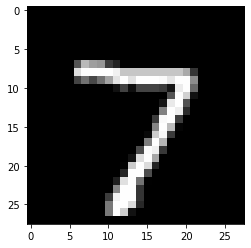

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(first_data, cmap = 'gray')
plt.show()

# Vanishing Gradient 문제 확인

FMLP 모델 정의 MLP 5-layer

In [ ]:
class FMLP(nn.Module): #5-layer
  def __init__(self):
    super(FMLP, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) 
    self.fc2 = nn.Linear(in_features = 100, out_features = 100) 
    self.fc3 = nn.Linear(in_features = 100, out_features = 100)  
    self.fc4 = nn.Linear(in_features = 100, out_features = 100)
    self.fc5 = nn.Linear(in_features = 100, out_features = 10)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.sigmoid(self.fc1(x))
    y = self.sigmoid(self.fc2(y))
    y = self.sigmoid(self.fc3(y))
    y = self.sigmoid(self.fc4(y))
    y = self.fc5(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 100    
learning_rate = 0.1 
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = FMLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 2.307777
Epoch: 2 Loss = 2.307154
Epoch: 3 Loss = 2.306285
Epoch: 4 Loss = 2.305994
Epoch: 5 Loss = 2.305313
Epoch: 6 Loss = 2.305184
Epoch: 7 Loss = 2.304595
Epoch: 8 Loss = 2.303776
Epoch: 9 Loss = 2.304045
Epoch: 10 Loss = 2.303682
Epoch: 11 Loss = 2.303396
Epoch: 12 Loss = 2.303408
Epoch: 13 Loss = 2.302983
Epoch: 14 Loss = 2.302866
Epoch: 15 Loss = 2.302973
Learning finished


weight parameter 저장

In [ ]:
torch.save(network.state_dict(), parameterPath + 'fmlp_mnist.pth')

저장된 weight parameter 불러오기

In [ ]:
new_network = FMLP()
new_network.load_state_dict(torch.load(parameterPath + "fmlp_mnist.pth"))

<All keys matched successfully>

MNIST Test dataset 분류 성능 확인

In [ ]:
img_test = mnist_test.data.float()
label_test = mnist_test.targets

prediction = network(img_test)  # 전체 test data를 한번에 계산

correct_prediction = torch.argmax(prediction, 1) == label_test
# 예측 값이 가장 높은 숫자(0~9)와 정답 데이터가 일치한 지 확인
accuracy = correct_prediction.float().mean()
print('Accuracy:', accuracy.item())

Accuracy: 0.11349999904632568


예측 결과 값 확인

In [ ]:
first_data = mnist_test.data[0]  # Test dataset 중 첫번째 image 추출
with torch.no_grad():
  prediction = network(first_data.view(-1, 784).float())
print(prediction)
#prediction 된 순서대로 - (0 ~ 9) 까지의 예측 값 확률
# test dataset 중 첫번째 image에 대한 예측값 확인

tensor([[ 0.0093,  0.1388,  0.0810, -0.0199, -0.0198,  0.0295, -0.0052,  0.0901,
          0.0416, -0.0076]])


In [ ]:
prediction_num = torch.argmax(prediction) # 예측 점수가 가장 높은 숫자 가져오기
print("예측 값은 %d 입니다." %(prediction_num))

예측 값은 1 입니다.


정답 이미지 확인

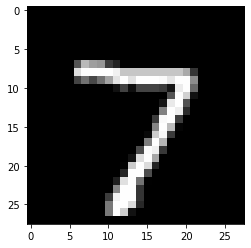

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(first_data, cmap = 'gray')
plt.show()

## Vanishing Gradient 문제 해결 (1) - 활성화 함수 변경

FMLP 모델 정의 MLP 5-layer

In [ ]:
class FMLP(nn.Module): #5-layer
  def __init__(self):
    super(FMLP, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) 
    self.fc2 = nn.Linear(in_features = 100, out_features = 100) 
    self.fc3 = nn.Linear(in_features = 100, out_features = 100)  
    self.fc4 = nn.Linear(in_features = 100, out_features = 100)
    self.fc5 = nn.Linear(in_features = 100, out_features = 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.relu(self.fc1(x))
    y = self.relu(self.fc2(y))
    y = self.relu(self.fc3(y))
    y = self.relu(self.fc4(y))
    y = self.fc5(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 100    
learning_rate = 0.1 
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = FMLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 1.186440
Epoch: 2 Loss = 0.249284
Epoch: 3 Loss = 0.156430
Epoch: 4 Loss = 0.116824
Epoch: 5 Loss = 0.093297
Epoch: 6 Loss = 0.077540
Epoch: 7 Loss = 0.064770
Epoch: 8 Loss = 0.056335
Epoch: 9 Loss = 0.046832
Epoch: 10 Loss = 0.042061
Epoch: 11 Loss = 0.036332
Epoch: 12 Loss = 0.031827
Epoch: 13 Loss = 0.028089
Epoch: 14 Loss = 0.026691
Epoch: 15 Loss = 0.019190
Learning finished


weight parameter 저장

In [ ]:
torch.save(network.state_dict(), parameterPath + 'fmlp_mnist.pth')

저장된 weight parameter 불러오기

In [ ]:
new_network = FMLP()
new_network.load_state_dict(torch.load(parameterPath + "fmlp_mnist.pth"))

<All keys matched successfully>

MNIST Test dataset 분류 성능 확인

In [ ]:
with torch.no_grad(): #test에서는 기울기 계산 제외
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.972100019454956


## Vanishing Gradient 문제 해결 (2) - 가중치 초기화 사용

FMLP 모델 정의 MLP 5-layer

In [ ]:
class FMLP(nn.Module): #5-layer
  def __init__(self):
    super(FMLP, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) 
    self.fc2 = nn.Linear(in_features = 100, out_features = 100) 
    self.fc3 = nn.Linear(in_features = 100, out_features = 100)  
    self.fc4 = nn.Linear(in_features = 100, out_features = 100)
    self.fc5 = nn.Linear(in_features = 100, out_features = 10)
    self.sigmoid = nn.Sigmoid()

    torch.nn.init.xavier_normal_(self.fc1.weight.data)
    torch.nn.init.xavier_normal_(self.fc2.weight.data)
    torch.nn.init.xavier_normal_(self.fc3.weight.data)
    torch.nn.init.xavier_normal_(self.fc4.weight.data)
    torch.nn.init.xavier_normal_(self.fc5.weight.data)

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.sigmoid(self.fc1(x))
    y = self.sigmoid(self.fc2(y))
    y = self.sigmoid(self.fc3(y))
    y = self.sigmoid(self.fc4(y))
    y = self.fc5(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 100    
learning_rate = 0.1 
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = FMLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 2.307769
Epoch: 2 Loss = 2.304531
Epoch: 3 Loss = 2.297780
Epoch: 4 Loss = 2.254815
Epoch: 5 Loss = 1.766185
Epoch: 6 Loss = 1.303261
Epoch: 7 Loss = 0.965479
Epoch: 8 Loss = 0.723913
Epoch: 9 Loss = 0.553500
Epoch: 10 Loss = 0.460674
Epoch: 11 Loss = 0.400822
Epoch: 12 Loss = 0.356595
Epoch: 13 Loss = 0.317369
Epoch: 14 Loss = 0.283979
Epoch: 15 Loss = 0.258008
Learning finished


weight parameter 저장

In [ ]:
torch.save(network.state_dict(), parameterPath + 'fmlp_mnist.pth')

저장된 weight parameter 불러오기

In [ ]:
new_network = FMLP()
new_network.load_state_dict(torch.load(parameterPath + "fmlp_mnist.pth"))

<All keys matched successfully>

MNIST Test dataset 분류 성능 확인

In [ ]:
with torch.no_grad(): #test에서는 기울기 계산 제외
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.8966000080108643


## Vanishing Gradient 문제 해결 (3) - 최적화 SGD->Adam

FMLP 모델 정의 MLP 5-layer

In [ ]:
class FMLP(nn.Module): #5-layer
  def __init__(self):
    super(FMLP, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) 
    self.fc2 = nn.Linear(in_features = 100, out_features = 100) 
    self.fc3 = nn.Linear(in_features = 100, out_features = 100)  
    self.fc4 = nn.Linear(in_features = 100, out_features = 100)
    self.fc5 = nn.Linear(in_features = 100, out_features = 10)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.sigmoid(self.fc1(x))
    y = self.sigmoid(self.fc2(y))
    y = self.sigmoid(self.fc3(y))
    y = self.sigmoid(self.fc4(y))
    y = self.fc5(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 100    
learning_rate = 0.1 
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = FMLP()
optimizer = torch.optim.Adam(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 2.328657
Epoch: 2 Loss = 2.308313
Epoch: 3 Loss = 2.308182
Epoch: 4 Loss = 2.308019
Epoch: 5 Loss = 2.309391
Epoch: 6 Loss = 2.307578
Epoch: 7 Loss = 2.308119
Epoch: 8 Loss = 2.307800
Epoch: 9 Loss = 2.307859
Epoch: 10 Loss = 2.307208
Epoch: 11 Loss = 2.307513
Epoch: 12 Loss = 2.308599
Epoch: 13 Loss = 2.308298
Epoch: 14 Loss = 2.309080
Epoch: 15 Loss = 2.308886
Learning finished


weight parameter 저장

In [ ]:
torch.save(network.state_dict(), parameterPath + 'fmlp_mnist.pth')

저장된 weight parameter 불러오기

In [ ]:
new_network = FMLP()
new_network.load_state_dict(torch.load(parameterPath + "fmlp_mnist.pth"))

<All keys matched successfully>

MNIST Test dataset 분류 성능 확인

In [ ]:
with torch.no_grad(): #test에서는 기울기 계산 제외
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.10279999673366547


## Vanishing Gradient 문제 해결 (1),(2) 둘 다 사용

FMLP 모델 정의 MLP 5-layer

In [ ]:
class FMLP(nn.Module): #5-layer
  def __init__(self):
    super(FMLP, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) 
    self.fc2 = nn.Linear(in_features = 100, out_features = 100) 
    self.fc3 = nn.Linear(in_features = 100, out_features = 100)  
    self.fc4 = nn.Linear(in_features = 100, out_features = 100)
    self.fc5 = nn.Linear(in_features = 100, out_features = 10)
    self.relu = nn.ReLU()

    torch.nn.init.xavier_normal_(self.fc1.weight.data)
    torch.nn.init.xavier_normal_(self.fc2.weight.data)
    torch.nn.init.xavier_normal_(self.fc3.weight.data)
    torch.nn.init.xavier_normal_(self.fc4.weight.data)
    torch.nn.init.xavier_normal_(self.fc5.weight.data)

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.relu(self.fc1(x))
    y = self.relu(self.fc2(y))
    y = self.relu(self.fc3(y))
    y = self.relu(self.fc4(y))
    y = self.fc5(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 100    
learning_rate = 0.1 
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = FMLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 0.449052
Epoch: 2 Loss = 0.162219
Epoch: 3 Loss = 0.116490
Epoch: 4 Loss = 0.090944
Epoch: 5 Loss = 0.073949
Epoch: 6 Loss = 0.062619
Epoch: 7 Loss = 0.052297
Epoch: 8 Loss = 0.043492
Epoch: 9 Loss = 0.037649
Epoch: 10 Loss = 0.030675
Epoch: 11 Loss = 0.028936
Epoch: 12 Loss = 0.024662
Epoch: 13 Loss = 0.019285
Epoch: 14 Loss = 0.015583
Epoch: 15 Loss = 0.013231
Learning finished


weight parameter 저장

In [ ]:
torch.save(network.state_dict(), parameterPath + 'fmlp_mnist.pth')

저장된 weight parameter 불러오기

In [ ]:
new_network = FMLP()
new_network.load_state_dict(torch.load(parameterPath + "fmlp_mnist.pth"))

<All keys matched successfully>

MNIST Test dataset 분류 성능 확인

In [ ]:
with torch.no_grad(): #test에서는 기울기 계산 제외
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.9704999923706055


## 예측 결과 값 확인

In [ ]:
first_data = mnist_test.data[0]  # Test dataset 중 첫번째 image 추출
with torch.no_grad():
  prediction = network(first_data.view(-1, 784).float())
print(prediction)
#prediction 된 순서대로 - (0 ~ 9) 까지의 예측 값 확률
# test dataset 중 첫번째 image에 대한 예측값 확인

tensor([[ -668.2463,   839.1596,    47.3340,  1420.8489,  -689.7248, -1933.2693,
         -2679.4238,  4256.5840,  -258.4958,  1083.0088]])


In [ ]:
prediction_num = torch.argmax(prediction) # 예측 점수가 가장 높은 숫자 가져오기
print("예측 값은 %d 입니다." %(prediction_num))

예측 값은 7 입니다.


정답 이미지 확인

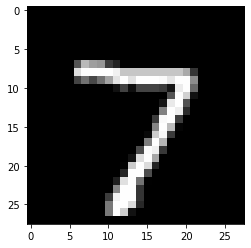

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(first_data, cmap = 'gray')
plt.show()

# Overfitting 문제 확인

MNIST train dataset 개수 변경

In [ ]:
mnist_train.data = mnist_train.data[:300]
mnist_train.targets = mnist_train.targets[:300]
mnist_train

Dataset MNIST
    Number of datapoints: 300
    Root location: /content/drive/MyDrive/dataset/
    Split: Train
    StandardTransform
Transform: ToTensor()

FMLP 모델 정의 MLP 5-layer

In [ ]:
class FMLP(nn.Module): #5-layer
  def __init__(self):
    super(FMLP, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) 
    self.fc2 = nn.Linear(in_features = 100, out_features = 100) 
    self.fc3 = nn.Linear(in_features = 100, out_features = 100)  
    self.fc4 = nn.Linear(in_features = 100, out_features = 100)
    self.fc5 = nn.Linear(in_features = 100, out_features = 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.relu(self.fc1(x))
    y = self.relu(self.fc2(y))
    y = self.relu(self.fc3(y))
    y = self.relu(self.fc4(y))
    y = self.fc5(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 10    
learning_rate = 0.1 
training_epochs = 100
loss_function = nn.CrossEntropyLoss()
network = FMLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 2.301294
Epoch: 2 Loss = 2.289797
Epoch: 3 Loss = 2.278899
Epoch: 4 Loss = 2.253967
Epoch: 5 Loss = 2.167538
Epoch: 6 Loss = 1.912582
Epoch: 7 Loss = 1.568231
Epoch: 8 Loss = 1.252547
Epoch: 9 Loss = 1.010878
Epoch: 10 Loss = 0.745768
Epoch: 11 Loss = 0.544713
Epoch: 12 Loss = 0.490793
Epoch: 13 Loss = 0.488628
Epoch: 14 Loss = 0.276006
Epoch: 15 Loss = 0.176381
Epoch: 16 Loss = 0.208185
Epoch: 17 Loss = 0.078421
Epoch: 18 Loss = 0.036388
Epoch: 19 Loss = 0.025633
Epoch: 20 Loss = 0.013770
Epoch: 21 Loss = 0.005828
Epoch: 22 Loss = 0.004001
Epoch: 23 Loss = 0.003354
Epoch: 24 Loss = 0.002790
Epoch: 25 Loss = 0.002422
Epoch: 26 Loss = 0.002205
Epoch: 27 Loss = 0.001912
Epoch: 28 Loss = 0.001726
Epoch: 29 Loss = 0.001597
Epoch: 30 Loss = 0.001444
Epoch: 31 Loss = 0.001343
Epoch: 32 Loss = 0.001243
Epoch: 33 Loss = 0.001164
Epoch: 34 Loss = 0.001094
Epoch: 35 Loss = 0.001023
Epoch: 36 Loss = 0.000971
Epoch: 37 Loss = 0.000913
Epoch: 38 Loss = 0.000869
Epoch: 39 Loss = 0.00

MNIST Train dataset 분류 성능 확인

In [ ]:
with torch.no_grad(): #test에서는 기울기 계산 제외
  img_test = mnist_train.data.float()
  label_test = mnist_train.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 1.0


MNIST Test dataset 분류 성능 확인

In [ ]:
with torch.no_grad(): #test에서는 기울기 계산 제외
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.7597000002861023


예측 결과 값 확인

In [ ]:
first_data = mnist_train.data[0]  # Train dataset 중 첫번째 image 추출
with torch.no_grad():
  prediction = network(first_data.view(-1, 784).float())
print(prediction)
#prediction 된 순서대로 - (0 ~ 9) 까지의 예측 값 확률
# train dataset 중 첫번째 image에 대한 예측값 확인

tensor([[ 1018.0856,  -178.9601,  1295.3707,  1314.9355, -1854.9814,  3283.0095,
         -1816.5219, -1247.8401,   900.4593, -1974.9366]])


In [ ]:
prediction_num = torch.argmax(prediction) # 예측 점수가 가장 높은 숫자 가져오기
print("예측 값은 %d 입니다." %(prediction_num))

예측 값은 5 입니다.


정답 이미지 확인

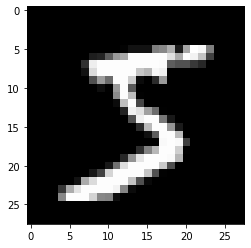

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(first_data, cmap = 'gray')
plt.show()

In [ ]:
first_data = mnist_test.data[0]  # Test dataset 중 첫번째 image 추출
with torch.no_grad():
  prediction = network(first_data.view(-1, 784).float())
print(prediction)
#prediction 된 순서대로 - (0 ~ 9) 까지의 예측 값 확률
# test dataset 중 첫번째 image에 대한 예측값 확인

tensor([[  273.1032,    24.8476,  -200.1259, -3951.7419,   -77.0321,    95.0960,
         -1652.4163,  3943.3220,   307.0270,  1251.8794]])


In [ ]:
prediction_num = torch.argmax(prediction) # 예측 점수가 가장 높은 숫자 가져오기
print("예측 값은 %d 입니다." %(prediction_num))

예측 값은 7 입니다.


정답 이미지 확인

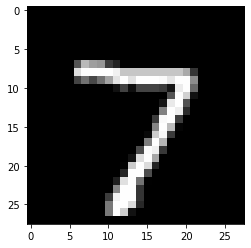

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(first_data, cmap = 'gray')
plt.show()

## Overfitting 문제 해결 (1) - Batch Normalization

MNIST train dataset 개수 변경

In [ ]:
mnist_train.data = mnist_train.data[:300]
mnist_train.targets = mnist_train.targets[:300]
mnist_train

Dataset MNIST
    Number of datapoints: 300
    Root location: /content/drive/MyDrive/dataset/
    Split: Train
    StandardTransform
Transform: ToTensor()

FMLP 모델 정의 MLP 5-layer

In [ ]:
class FMLP(nn.Module): #5-layer
  def __init__(self):
    super(FMLP, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) 
    self.fc2 = nn.Linear(in_features = 100, out_features = 100) 
    self.fc3 = nn.Linear(in_features = 100, out_features = 100)  
    self.fc4 = nn.Linear(in_features = 100, out_features = 100)
    self.fc5 = nn.Linear(in_features = 100, out_features = 10)
    self.relu = nn.ReLU()
    self.bn = nn.BatchNorm1d(100)  #Batch Normalization 100features

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.relu(self.bn(self.fc1(x)))
    y = self.relu(self.bn(self.fc2(y)))
    y = self.relu(self.bn(self.fc3(y)))
    y = self.relu(self.bn(self.fc4(y)))
    y = self.fc5(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 10    
learning_rate = 0.1 
training_epochs = 100
loss_function = nn.CrossEntropyLoss()
network = FMLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 1.516042
Epoch: 2 Loss = 0.867158
Epoch: 3 Loss = 0.588037
Epoch: 4 Loss = 0.555208
Epoch: 5 Loss = 0.616016
Epoch: 6 Loss = 0.358939
Epoch: 7 Loss = 0.455619
Epoch: 8 Loss = 0.353114
Epoch: 9 Loss = 0.270333
Epoch: 10 Loss = 0.145103
Epoch: 11 Loss = 0.200708
Epoch: 12 Loss = 0.161467
Epoch: 13 Loss = 0.199042
Epoch: 14 Loss = 0.185464
Epoch: 15 Loss = 0.237943
Epoch: 16 Loss = 0.151626
Epoch: 17 Loss = 0.339974
Epoch: 18 Loss = 0.206240
Epoch: 19 Loss = 0.180722
Epoch: 20 Loss = 0.158245
Epoch: 21 Loss = 0.114591
Epoch: 22 Loss = 0.118504
Epoch: 23 Loss = 0.051302
Epoch: 24 Loss = 0.070895
Epoch: 25 Loss = 0.079775
Epoch: 26 Loss = 0.139494
Epoch: 27 Loss = 0.139928
Epoch: 28 Loss = 0.138141
Epoch: 29 Loss = 0.077599
Epoch: 30 Loss = 0.106035
Epoch: 31 Loss = 0.068400
Epoch: 32 Loss = 0.072839
Epoch: 33 Loss = 0.061202
Epoch: 34 Loss = 0.047996
Epoch: 35 Loss = 0.084249
Epoch: 36 Loss = 0.069900
Epoch: 37 Loss = 0.067066
Epoch: 38 Loss = 0.039913
Epoch: 39 Loss = 0.08

MNIST Test dataset 분류 성능 확인

In [ ]:
with torch.no_grad(): #test에서는 기울기 계산 제외
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.8008999824523926


## Overfitting 문제 해결 (2) - Dropout

MNIST train dataset 개수 변경

In [ ]:
mnist_train.data = mnist_train.data[:300]
mnist_train.targets = mnist_train.targets[:300]
mnist_train

Dataset MNIST
    Number of datapoints: 300
    Root location: /content/drive/MyDrive/dataset/
    Split: Train
    StandardTransform
Transform: ToTensor()

FMLP 모델 정의 MLP 5-layer

In [ ]:
class FMLP(nn.Module): #5-layer
  def __init__(self):
    super(FMLP, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) 
    self.fc2 = nn.Linear(in_features = 100, out_features = 100) 
    self.fc3 = nn.Linear(in_features = 100, out_features = 100)  
    self.fc4 = nn.Linear(in_features = 100, out_features = 100)
    self.fc5 = nn.Linear(in_features = 100, out_features = 10)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.2)  #노드 20% 삭제

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.relu(self.fc1(x))
    y = self.relu(self.fc2(y))
    y = self.relu(self.fc3(y))
    y = self.relu(self.fc4(y))
    y = self.dropout(y)
    y = self.fc5(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 10    
learning_rate = 0.1 
training_epochs = 100
loss_function = nn.CrossEntropyLoss()
network = FMLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 2.302795
Epoch: 2 Loss = 2.293896
Epoch: 3 Loss = 2.286262
Epoch: 4 Loss = 2.275314
Epoch: 5 Loss = 2.236445
Epoch: 6 Loss = 2.082249
Epoch: 7 Loss = 1.812422
Epoch: 8 Loss = 1.507063
Epoch: 9 Loss = 1.278505
Epoch: 10 Loss = 1.000014
Epoch: 11 Loss = 0.866348
Epoch: 12 Loss = 0.806860
Epoch: 13 Loss = 0.605973
Epoch: 14 Loss = 0.585741
Epoch: 15 Loss = 0.545639
Epoch: 16 Loss = 0.356595
Epoch: 17 Loss = 0.491374
Epoch: 18 Loss = 0.234692
Epoch: 19 Loss = 0.147499
Epoch: 20 Loss = 0.072110
Epoch: 21 Loss = 0.065290
Epoch: 22 Loss = 0.087758
Epoch: 23 Loss = 0.017555
Epoch: 24 Loss = 0.013546
Epoch: 25 Loss = 0.009736
Epoch: 26 Loss = 0.007271
Epoch: 27 Loss = 0.004917
Epoch: 28 Loss = 0.004411
Epoch: 29 Loss = 0.004825
Epoch: 30 Loss = 0.002839
Epoch: 31 Loss = 0.003221
Epoch: 32 Loss = 0.003227
Epoch: 33 Loss = 0.001858
Epoch: 34 Loss = 0.001937
Epoch: 35 Loss = 0.005478
Epoch: 36 Loss = 0.002777
Epoch: 37 Loss = 0.002463
Epoch: 38 Loss = 0.001205
Epoch: 39 Loss = 0.00

MNIST Test dataset 분류 성능 확인

In [ ]:
with torch.no_grad(): #test에서는 기울기 계산 제외
  network.eval()  # test 에서는 drop out 제외
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.7687000036239624


## Overfitting 문제 해결 (3) - Data Augmentation

MNIST train dataset 개수 변경

In [ ]:
mnist_train.data = mnist_train.data[:300]
mnist_train.targets = mnist_train.targets[:300]
mnist_train

Dataset MNIST
    Number of datapoints: 300
    Root location: /content/drive/MyDrive/dataset/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
import torchvision.transforms as transform

In [ ]:
trans_rotation_right_10 = transform.RandomRotation((10, 10))
rotation_data_right_10 = trans_rotation_right_10(mnist_train.data)

trans_rotation_right_20 = transform.RandomRotation((20, 20))
rotation_data_right_20 = trans_rotation_right_10(mnist_train.data)

trans_rotation_right_30 = transform.RandomRotation((30, 30))
rotation_data_right_30 = trans_rotation_right_10(mnist_train.data)

trans_rotation_left_10 = transform.RandomRotation((-10, -10))
rotation_data_left_10 = trans_rotation_left_10(mnist_train.data)

trans_rotation_left_20 = transform.RandomRotation((-20, -20))
rotation_data_left_20 = trans_rotation_left_10(mnist_train.data)

trans_rotation_left_30 = transform.RandomRotation((-30, -30))
rotation_data_left_30 = trans_rotation_left_10(mnist_train.data)

In [ ]:
print(rotation_data_right_10.shape)
print(rotation_data_right_20.shape)
print(rotation_data_right_30.shape)
print(rotation_data_left_10.shape)
print(rotation_data_left_20.shape)
print(rotation_data_left_30.shape)

torch.Size([300, 28, 28])
torch.Size([300, 28, 28])
torch.Size([300, 28, 28])
torch.Size([300, 28, 28])
torch.Size([300, 28, 28])
torch.Size([300, 28, 28])


In [ ]:
mnist_train.data = torch.cat((mnist_train.data, rotation_data_right_10, rotation_data_right_20, rotation_data_right_30, rotation_data_left_10, rotation_data_left_20, rotation_data_left_30),0)
mnist_train.data.shape

torch.Size([2100, 28, 28])

In [ ]:
mnist_train.targets = mnist_train.targets.repeat(7)
mnist_train.targets.shape

torch.Size([2100])

In [ ]:
print(mnist_train.targets[0])
print(mnist_train.targets[300])
print(mnist_train.targets[600])
print(mnist_train.targets[900])
print(mnist_train.targets[1200])

tensor(5)
tensor(5)
tensor(5)
tensor(5)
tensor(5)


FMLP 모델 정의 MLP 5-layer

In [ ]:
class FMLP(nn.Module): #5-layer
  def __init__(self):
    super(FMLP, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) 
    self.fc2 = nn.Linear(in_features = 100, out_features = 100) 
    self.fc3 = nn.Linear(in_features = 100, out_features = 100)  
    self.fc4 = nn.Linear(in_features = 100, out_features = 100)
    self.fc5 = nn.Linear(in_features = 100, out_features = 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.relu(self.fc1(x))
    y = self.relu(self.fc2(y))
    y = self.relu(self.fc3(y))
    y = self.relu(self.fc4(y))
    y = self.fc5(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 10    
learning_rate = 0.1 
training_epochs = 100
loss_function = nn.CrossEntropyLoss()
network = FMLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 2.214488
Epoch: 2 Loss = 1.223498
Epoch: 3 Loss = 0.556554
Epoch: 4 Loss = 0.172034
Epoch: 5 Loss = 0.065101
Epoch: 6 Loss = 0.065792
Epoch: 7 Loss = 0.062045
Epoch: 8 Loss = 0.001744
Epoch: 9 Loss = 0.000841
Epoch: 10 Loss = 0.000544
Epoch: 11 Loss = 0.000402
Epoch: 12 Loss = 0.000318
Epoch: 13 Loss = 0.000262
Epoch: 14 Loss = 0.000222
Epoch: 15 Loss = 0.000193
Epoch: 16 Loss = 0.000170
Epoch: 17 Loss = 0.000151
Epoch: 18 Loss = 0.000137
Epoch: 19 Loss = 0.000124
Epoch: 20 Loss = 0.000114
Epoch: 21 Loss = 0.000105
Epoch: 22 Loss = 0.000098
Epoch: 23 Loss = 0.000091
Epoch: 24 Loss = 0.000085
Epoch: 25 Loss = 0.000080
Epoch: 26 Loss = 0.000075
Epoch: 27 Loss = 0.000071
Epoch: 28 Loss = 0.000068
Epoch: 29 Loss = 0.000064
Epoch: 30 Loss = 0.000061
Epoch: 31 Loss = 0.000058
Epoch: 32 Loss = 0.000056
Epoch: 33 Loss = 0.000054
Epoch: 34 Loss = 0.000051
Epoch: 35 Loss = 0.000049
Epoch: 36 Loss = 0.000048
Epoch: 37 Loss = 0.000046
Epoch: 38 Loss = 0.000044
Epoch: 39 Loss = 0.00

MNIST Test dataset 분류 성능 확인

In [ ]:
with torch.no_grad(): #test에서는 기울기 계산 제외
  network.eval()
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.8155999779701233


FMLP 모델 정의 MLP 5-layer

In [ ]:
class FMLP(nn.Module): #5-layer
  def __init__(self):
    super(FMLP, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 100) 
    self.fc2 = nn.Linear(in_features = 100, out_features = 100) 
    self.fc3 = nn.Linear(in_features = 100, out_features = 100)  
    self.fc4 = nn.Linear(in_features = 100, out_features = 100)
    self.fc5 = nn.Linear(in_features = 100, out_features = 10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.view(-1, 28*28) # 이미지 평탄화
    y = self.relu(self.fc1(x))
    y = self.relu(self.fc2(y))
    y = self.relu(self.fc3(y))
    y = self.relu(self.fc4(y))
    y = self.fc5(y)
    return y

Hyper-parameter 지정

In [ ]:
batch_size = 100    
learning_rate = 0.1 
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = FMLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

Network Training

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch + 1, avg_cost))
  
print('Learning finished')

Epoch: 1 Loss = 1.186440
Epoch: 2 Loss = 0.249284
Epoch: 3 Loss = 0.156430
Epoch: 4 Loss = 0.116824
Epoch: 5 Loss = 0.093297
Epoch: 6 Loss = 0.077540
Epoch: 7 Loss = 0.064770
Epoch: 8 Loss = 0.056335
Epoch: 9 Loss = 0.046832
Epoch: 10 Loss = 0.042061
Epoch: 11 Loss = 0.036332
Epoch: 12 Loss = 0.031827
Epoch: 13 Loss = 0.028089
Epoch: 14 Loss = 0.026691
Epoch: 15 Loss = 0.019190
Learning finished


weight parameter 저장

In [ ]:
torch.save(network.state_dict(), parameterPath + 'fmlp_mnist.pth')

저장된 weight parameter 불러오기

In [ ]:
new_network = FMLP()
new_network.load_state_dict(torch.load(parameterPath + "fmlp_mnist.pth"))

<All keys matched successfully>

MNIST Test dataset 분류 성능 확인

In [ ]:
with torch.no_grad(): #test에서는 기울기 계산 제외
  img_test = mnist_test.data.float()
  label_test = mnist_test.targets

  prediction = network(img_test)  #전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.972100019454956
